# Homework 1 
# Ronak Mehta (SJSU ID: 014505387)

### Python code to implement Boxplot

In [2]:
import matplotlib.pyplot as plt 

In [3]:
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x11d82be90>,
 'caps': [<matplotlib.lines.Line2D at 0x11d832990>,
 'boxes': [<matplotlib.lines.Line2D at 0x11d6fda10>],
 'medians': [<matplotlib.lines.Line2D at 0x11d81f110>],
 'fliers': [<matplotlib.lines.Line2D at 0x11d838910>],
 'means': []}

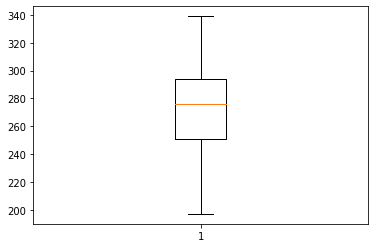

In [6]:
data = [197,199,234,267,269,276,281,289,299,301,339]
plt.boxplot(data)

### Problem 4: Follow the simple tutorial at https://www.machinelearningplus.com/logistic-regression-tutorial-examples-r/ (Links to an external site.) to see Logistic Regression in action. Implement the same functionality for the same dataset in Python. Do you achieve the same accuracy as with R?

In [24]:
### Import the necessary libraries
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
### Read the file using read_csv()
bc = pd.read_csv("/Users/ronakmehta/Desktop/BreastCancer.csv",encoding="utf-8")

In [5]:
bc.columns

Index(['Unnamed: 0', 'Id', 'Cl.thickness', 'Cell.size', 'Cell.shape',
       'Marg.adhesion', 'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin',
       'Normal.nucleoli', 'Mitoses', 'Class'],
      dtype='object')

### Remove 'Unnamed: 0' and 'Id' columns

In [6]:
bc = bc.drop(['Unnamed: 0', 'Id'],axis=1)

### The 'bc' dataframe does not contain any null values

In [7]:
bc.isnull().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [8]:
bc.dtypes

Cl.thickness        int64
Cell.size           int64
Cell.shape          int64
Marg.adhesion       int64
Epith.c.size        int64
Bare.nuclei         int64
Bl.cromatin         int64
Normal.nucleoli     int64
Mitoses             int64
Class              object
dtype: object

In [9]:
bc.Class.unique()

array(['benign', 'malignant'], dtype=object)

### Convert the Class categorical variable into numeric

In [10]:
bc['Class'] = bc['Class'].map({'malignant':1, 'benign':0})

In [11]:
bc.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [12]:
bc.dtypes

Cl.thickness       int64
Cell.size          int64
Cell.shape         int64
Marg.adhesion      int64
Epith.c.size       int64
Bare.nuclei        int64
Bl.cromatin        int64
Normal.nucleoli    int64
Mitoses            int64
Class              int64
dtype: object

In [22]:
bc['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(bc, 
           bc['Class'], test_size=0.30, 
            random_state=100)

In [56]:
X_test

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
388,5,3,3,1,2,1,2,1,1,0
588,5,4,6,8,4,1,8,10,1,1
203,5,1,1,1,1,1,3,1,1,0
546,5,1,1,1,2,1,3,1,1,0
436,5,1,1,1,2,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
620,10,10,7,8,7,1,10,10,3,1
136,4,1,2,1,2,1,2,1,1,0
533,3,1,1,1,1,1,1,1,1,0
381,3,1,1,1,2,1,2,1,1,0


### Balance the Data

In [35]:
bc_majority = X_train[X_train.Class==0]
bc_minority = X_train[X_train.Class==1]

In [36]:
X_train.Class.value_counts()

0    314
1    164
Name: Class, dtype: int64

In [37]:
bc_majority_downsampled = resample(bc_majority, replace=False, n_samples= 164, random_state=100)

In [38]:
bc_downsampled = pd.concat([bc_majority_downsampled,bc_minority])

In [39]:
bc_downsampled.Class.value_counts()

1    164
0    164
Name: Class, dtype: int64

In [64]:
y = bc_downsampled.Class
x = bc_downsampled.drop('Class',axis=1)

### Implement Logistic Regression model

In [65]:
logitMod = LogisticRegression(solver='lbfgs')

In [66]:
logitMod.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict the values with the trained model

In [75]:
X_test = X_test.drop('Class',axis=1)
Predictions = logitMod.predict(X_test)

### Obtain the accuracy 

In [76]:
score = logitMod.score(X_test,y_test)
print(score)

0.9609756097560975


### We can also upSample the dataframe instead of DownSampling it

In [ ]:
bc_majority = X_train[X_train.Class==0]
bc_minority = X_train[X_train.Class==1]

In [ ]:
bc_majority_upsampled = resample(bc_majority, replace=False, n_samples= 314, random_state=100)

In [ ]:
bc_upsampled = pd.concat([bc_majority_upsampled,bc_minority])

In [ ]:
y = bc_upsampled.Class
x = bc_upsampled.drop('Class',axis=1)